<a href="https://colab.research.google.com/github/KashinathJ/Projects-/blob/main/Global_terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [ ]:
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [ ]:
data.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:
data.shape

(21146, 18)

In [ ]:
data.isnull().sum()

Year              0
Month             0
day               0
Country           0
State            95
Region            0
City              0
latitude        908
longitude       908
Attacktype        0
kill           4105
Wound          5726
target1         212
summary       20168
Group             0
Targettype        0
Weapon            0
motive        20437
dtype: int64

In [ ]:
data['Wound'] = data['Wound'].fillna(0)
data['kill'] = data['kill'].fillna(0)

In [ ]:
data['Casualities'] = data['kill'] + data['Wound']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21146 entries, 0 to 21145
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         21146 non-null  int64  
 1   Month        21146 non-null  int64  
 2   day          21146 non-null  int64  
 3   Country      21146 non-null  object 
 4   State        21051 non-null  object 
 5   Region       21146 non-null  object 
 6   City         21146 non-null  object 
 7   latitude     20238 non-null  float64
 8   longitude    20238 non-null  float64
 9   Attacktype   21146 non-null  object 
 10  kill         21146 non-null  float64
 11  Wound        21146 non-null  float64
 12  target1      20934 non-null  object 
 13  summary      978 non-null    object 
 14  Group        21146 non-null  object 
 15  Targettype   21146 non-null  object 
 16  Weapon       21146 non-null  object 
 17  motive       709 non-null    object 
 18  Casualities  21146 non-null  float64
dtypes: f

In [ ]:
data.describe()

,Year,Month,day,latitude,longitude,kill,Wound,Casualities
count,21146.000000,21146.000000,21146.000000,20238.000000,2.023800e+04,21146.000000,21146.000000,21146.000000
mean,1979.026435,6.281708,15.185047,24.898481,-4.290513e+03,1.556701,1.078455,2.635156
std,3.542067,3.478263,8.951616,23.173912,6.058321e+05,8.062028,8.818312,12.989605
min,1970.000000,0.000000,0.000000,-51.692214,-8.618590e+07,0.000000,0.000000,0.000000
25%,1977.000000,3.000000,7.000000,13.595253,-8.626701e+01,0.000000,0.000000,0.000000
50%,1980.000000,6.000000,15.000000,32.010941,-7.649053e+00,0.000000,0.000000,0.000000
75%,1982.000000,9.000000,23.000000,42.815372,9.174508e+00,1.000000,0.000000,1.000000
max,1986.000000,12.000000,31.000000,64.837778,1.726362e+02,422.000000,700.000000,760.000000


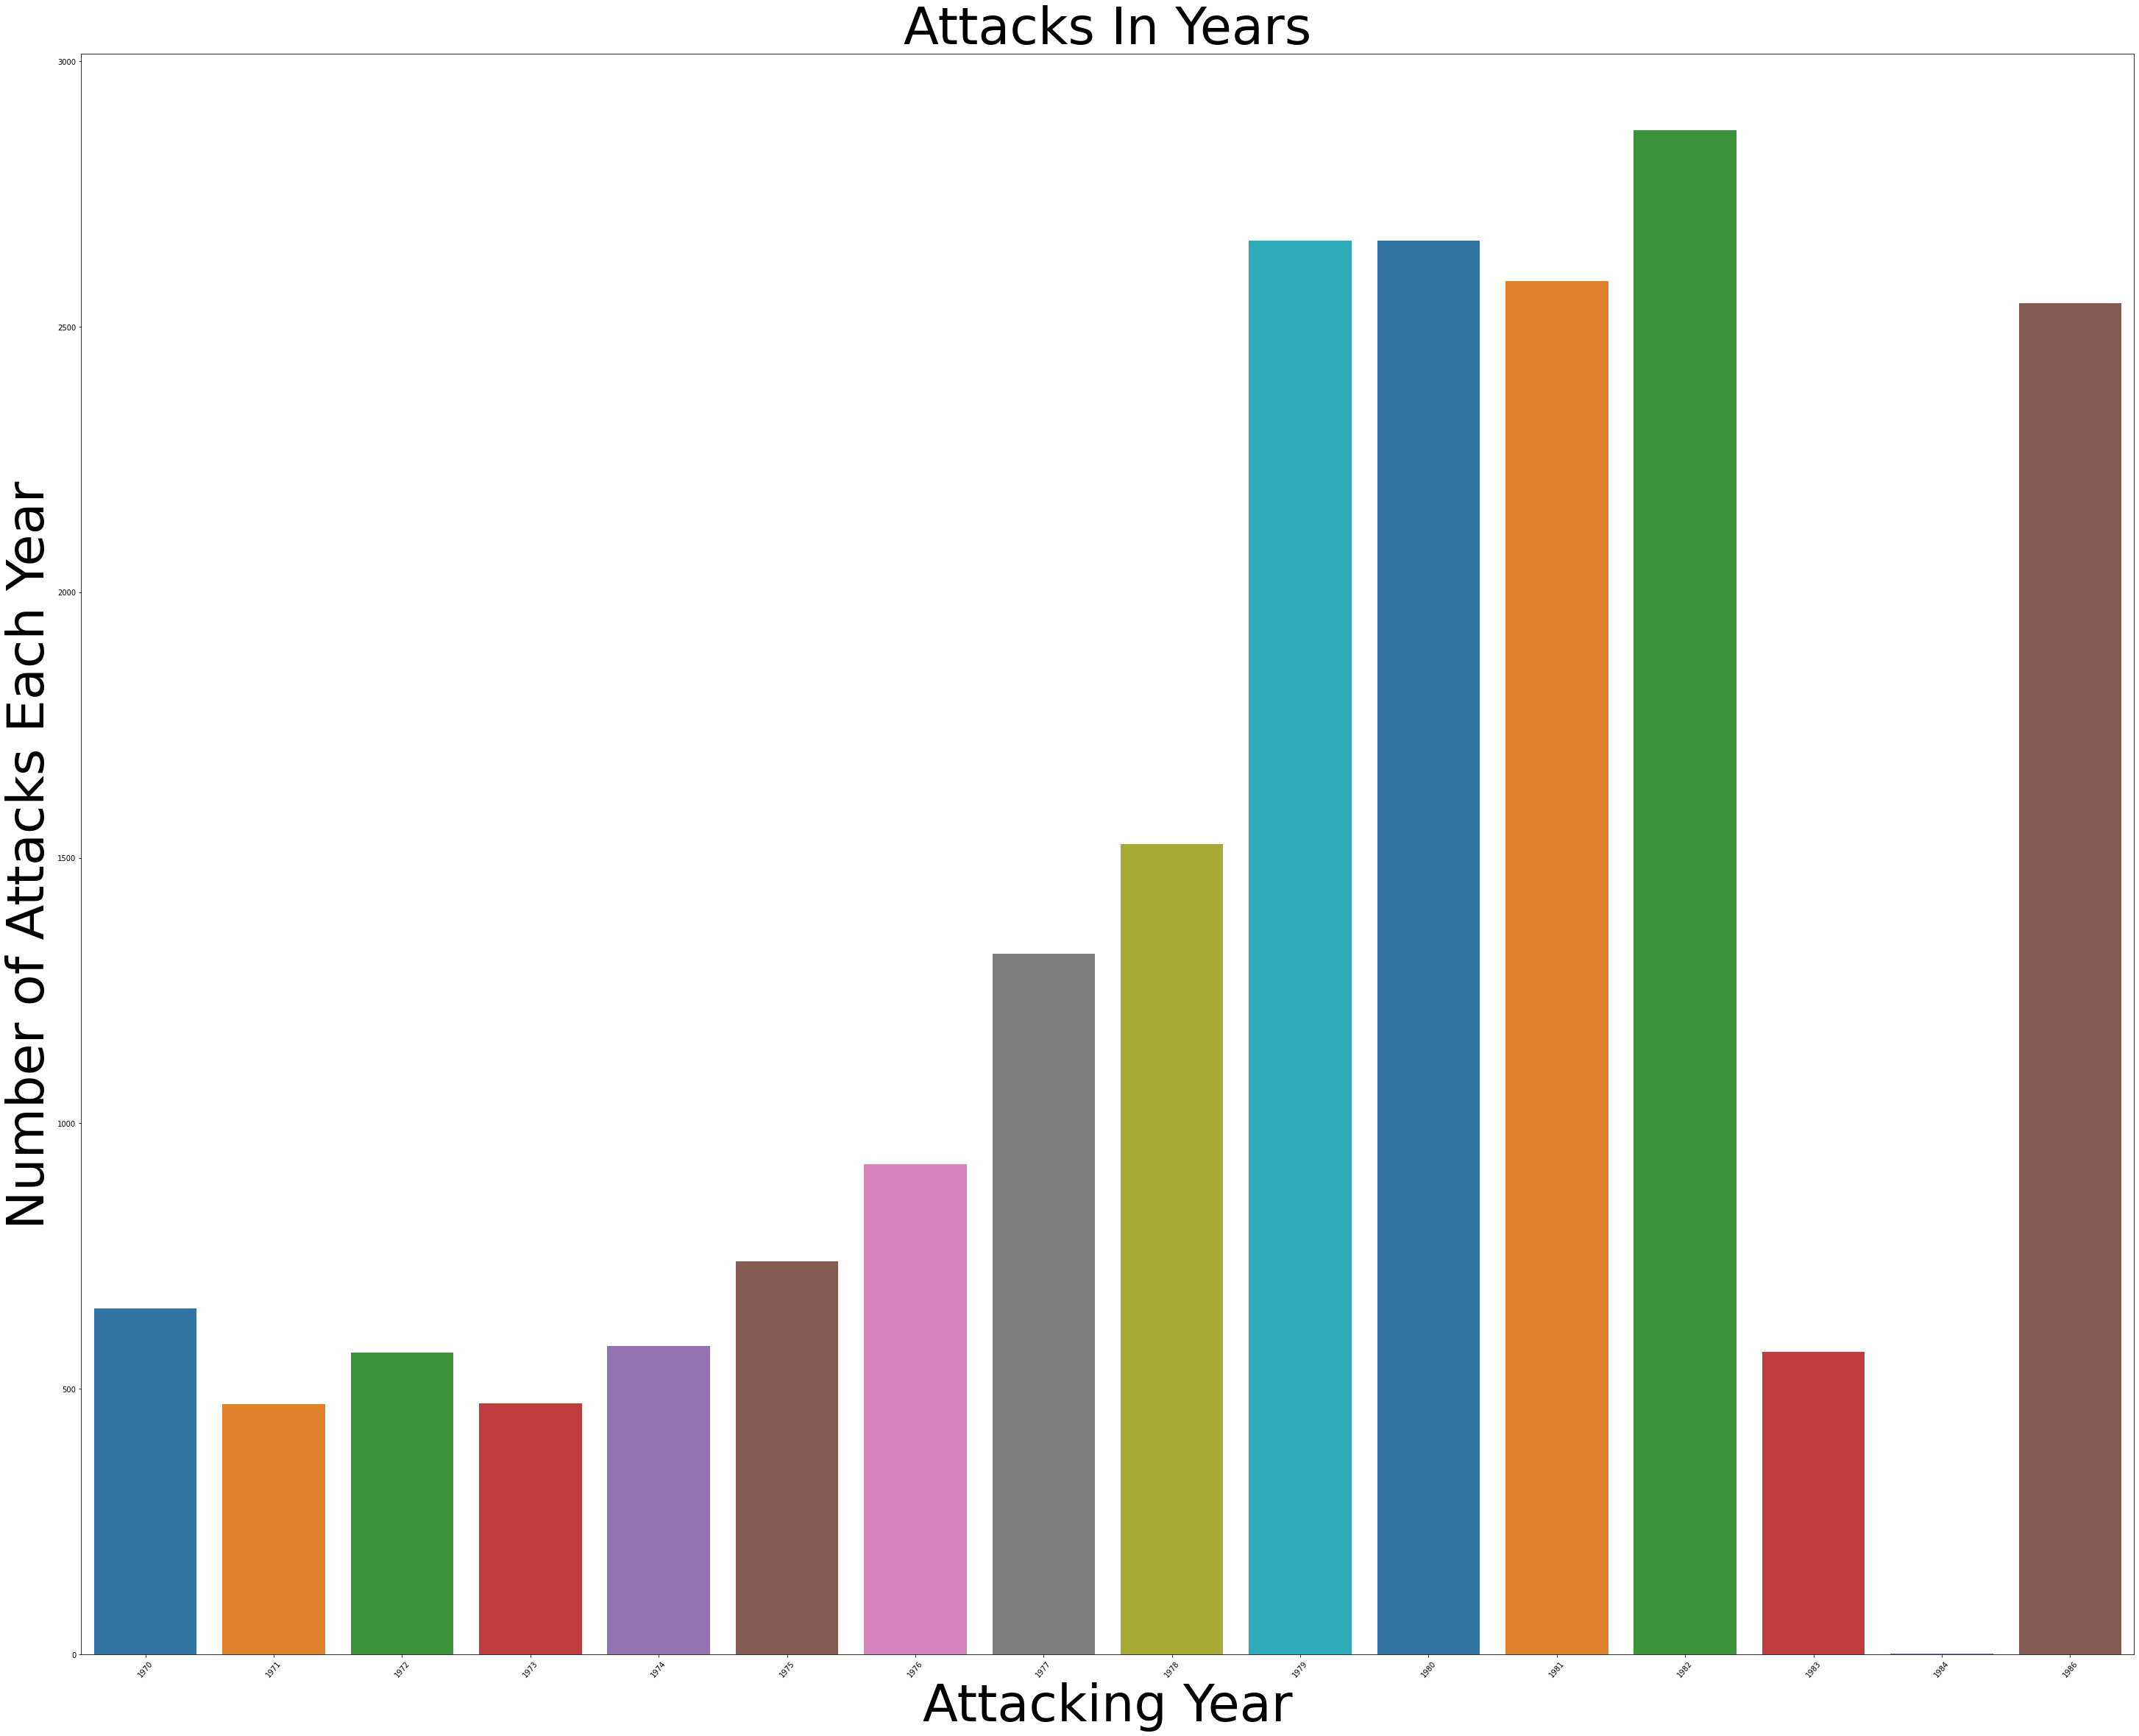

In [ ]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (50,40))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=70)
plt.ylabel('Number of Attacks Each Year',fontsize=70)
plt.title('Attacks In Years',fontsize=70)
plt.show()

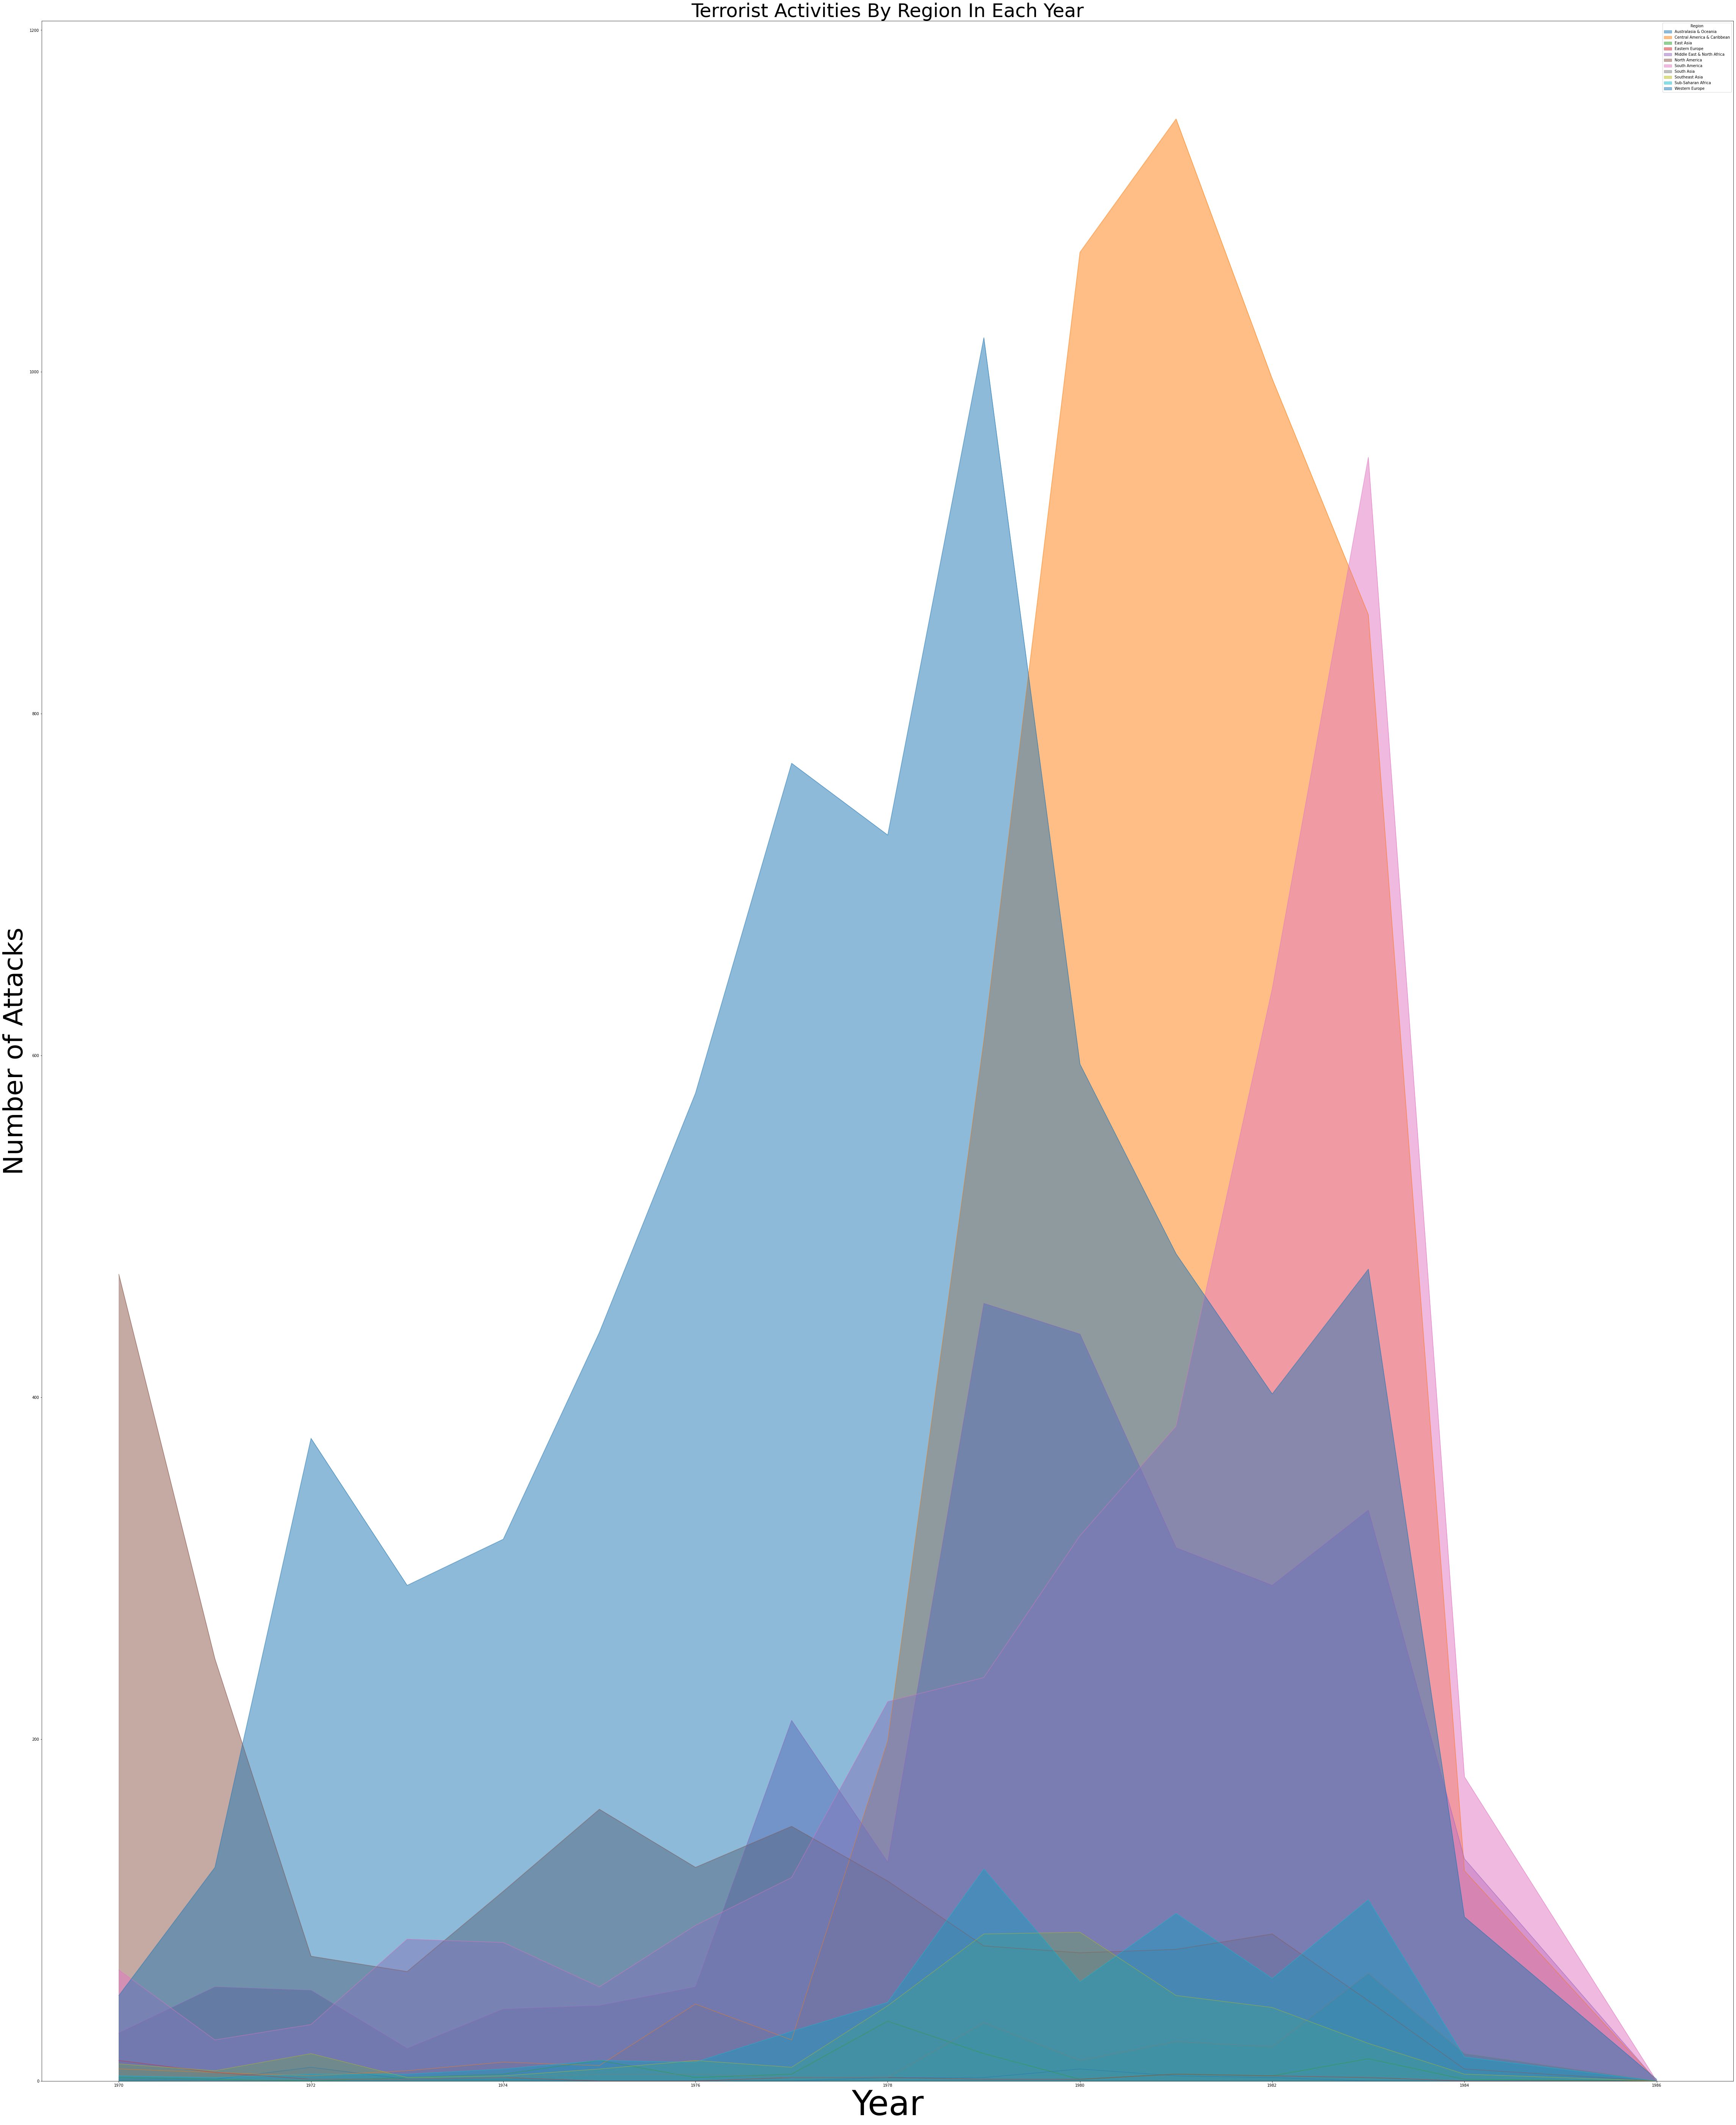

In [ ]:
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(80,100))
plt.title('Terrorist Activities By Region In Each Year',fontsize=50)
plt.ylabel('Number of Attacks',fontsize=70)
plt.xlabel("Year",fontsize=90)
plt.show()

In [ ]:
attack = data.Country.value_counts()[:10]
attack

El Salvador       2778
United Kingdom    2231
United States     1745
Spain             1493
Guatemala         1302
Colombia          1243
Italy             1233
Peru              1190
France             834
Nicaragua          770
Name: Country, dtype: int64

In [ ]:
data.Group.value_counts()[1:10]

Irish Republican Army (IRA)                         1447
Farabundo Marti National Liberation Front (FMLN)     968
Shining Path (SL)                                    927
Basque Fatherland and Freedom (ETA)                  870
Palestinians                                         469
Revolutionary Armed Forces of Colombia (FARC)        372
M-19 (Movement of April 19)                          292
Protestant extremists                                226
Nicaraguan Democratic Force (FDN)                    222
Name: Group, dtype: int64

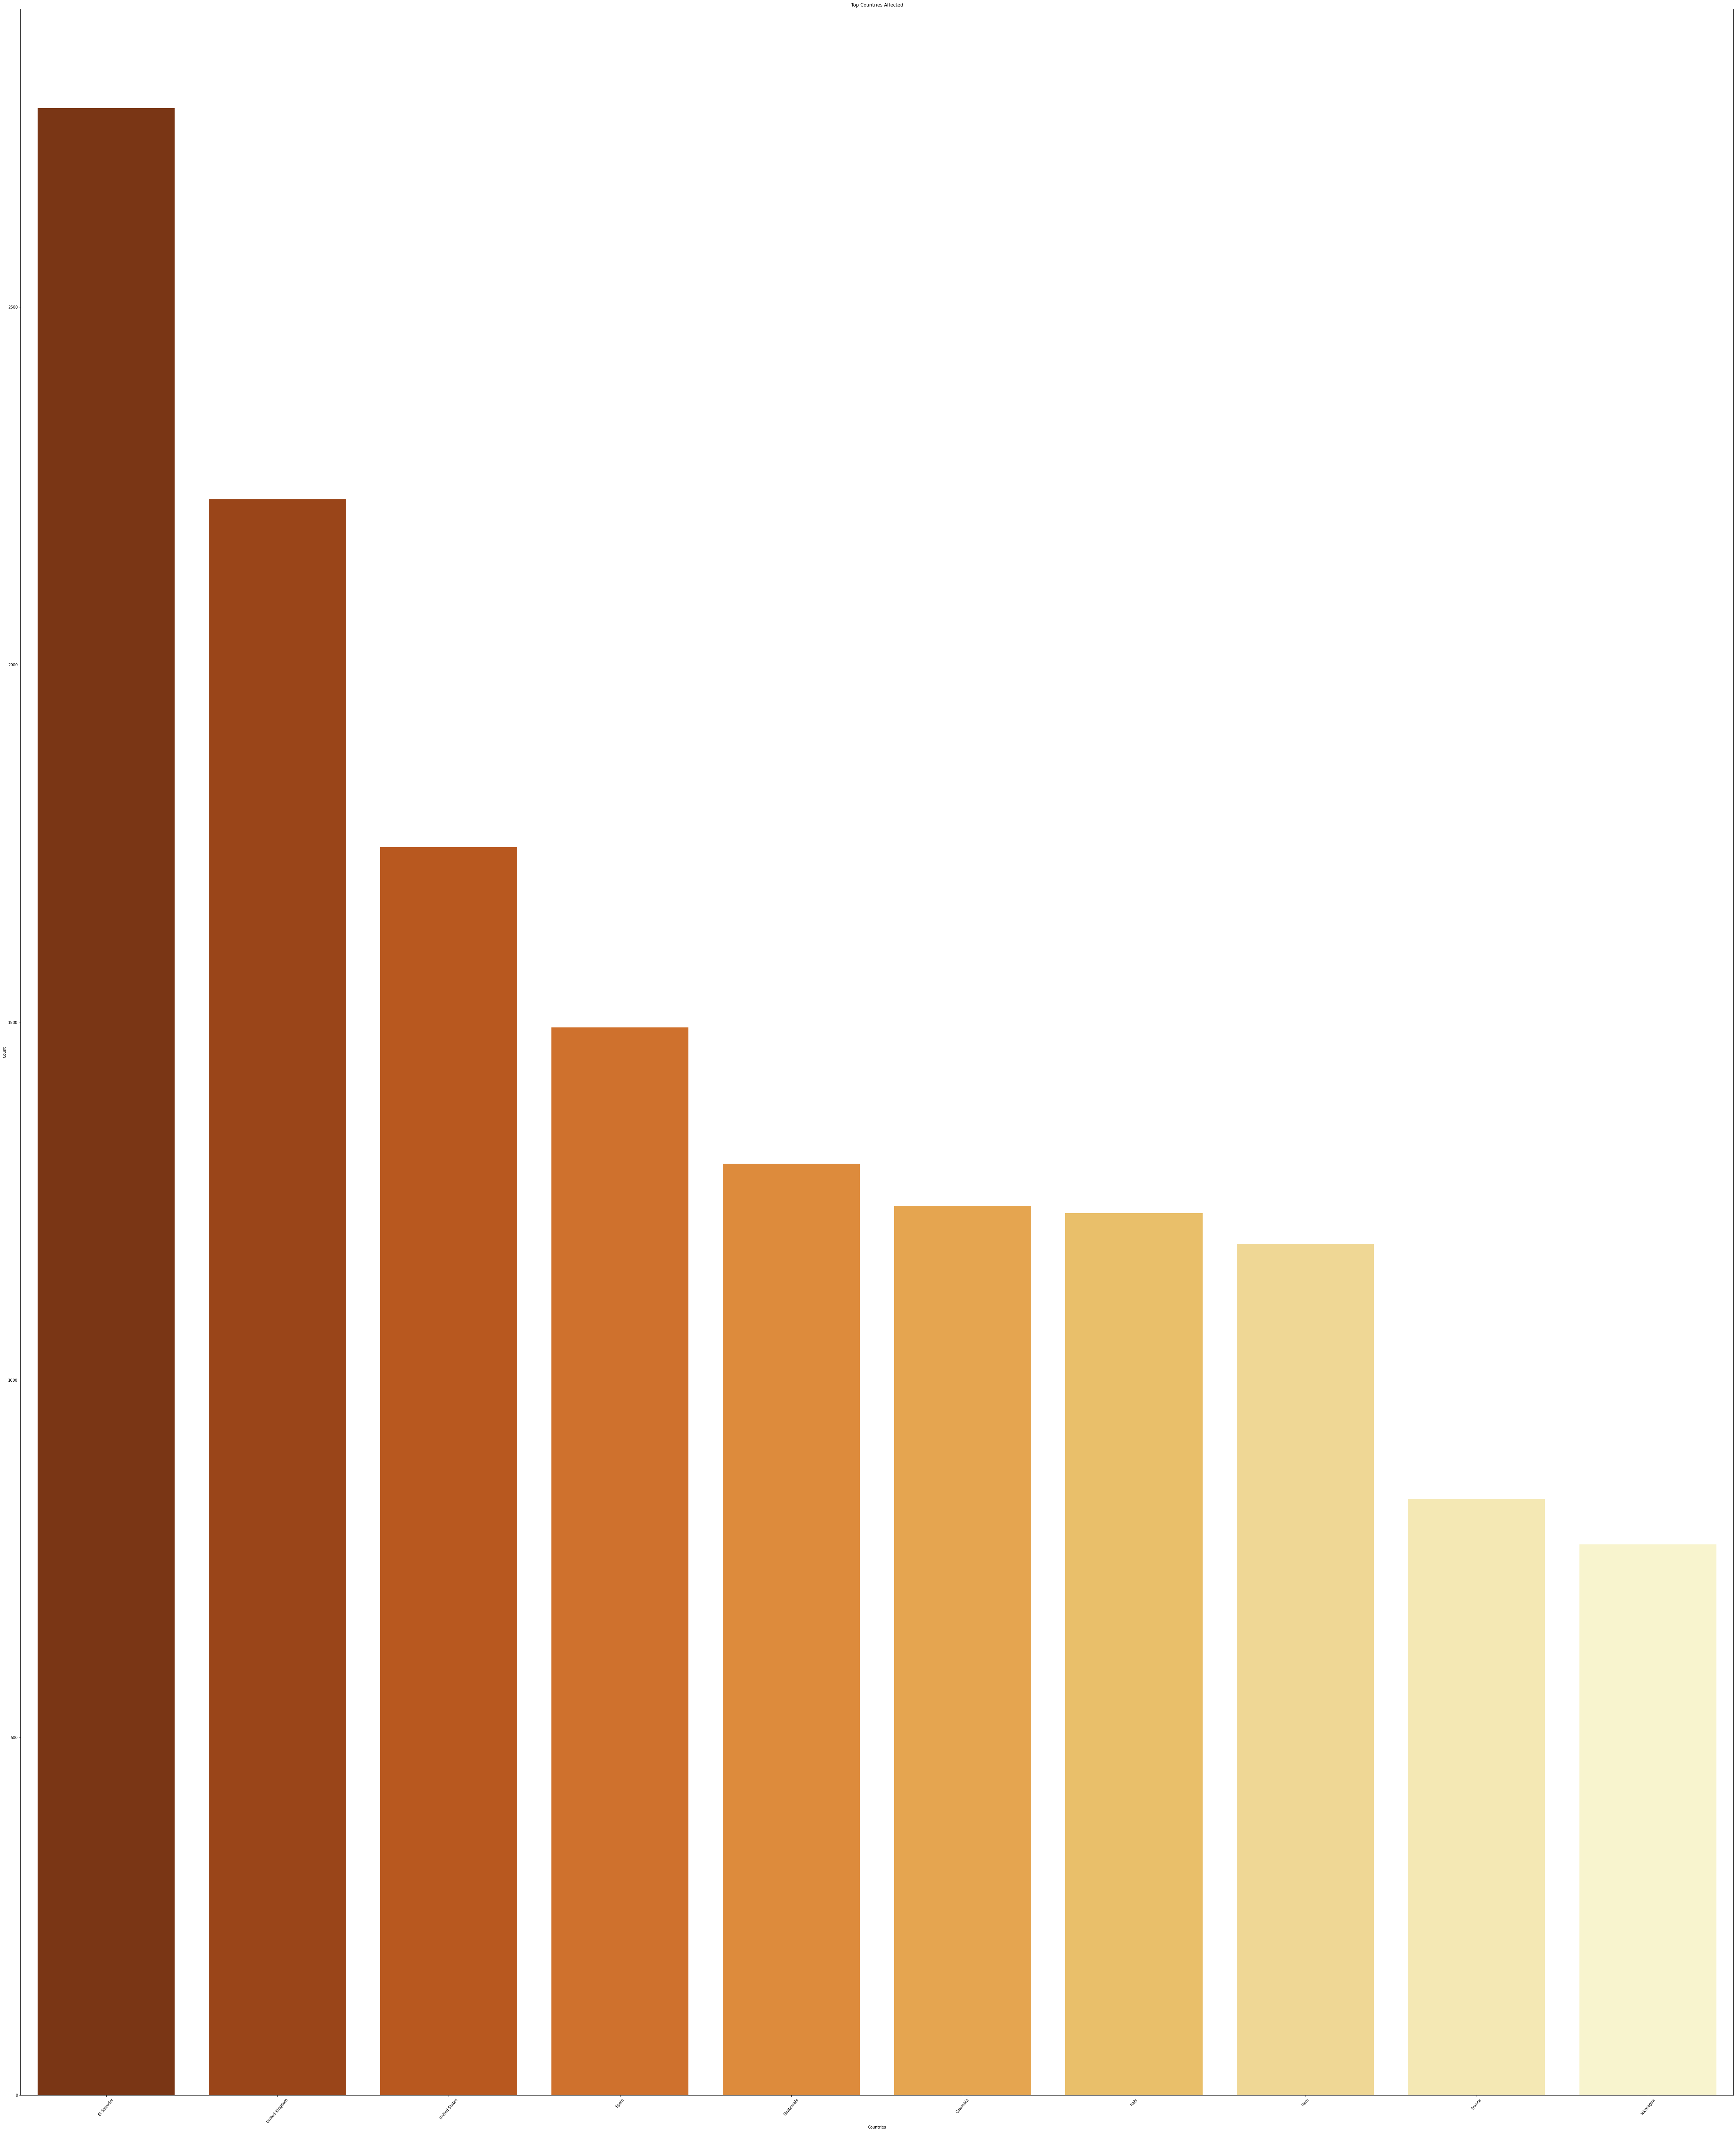

In [ ]:
plt.subplots(figsize=(80,100))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette='YlOrBr_r')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

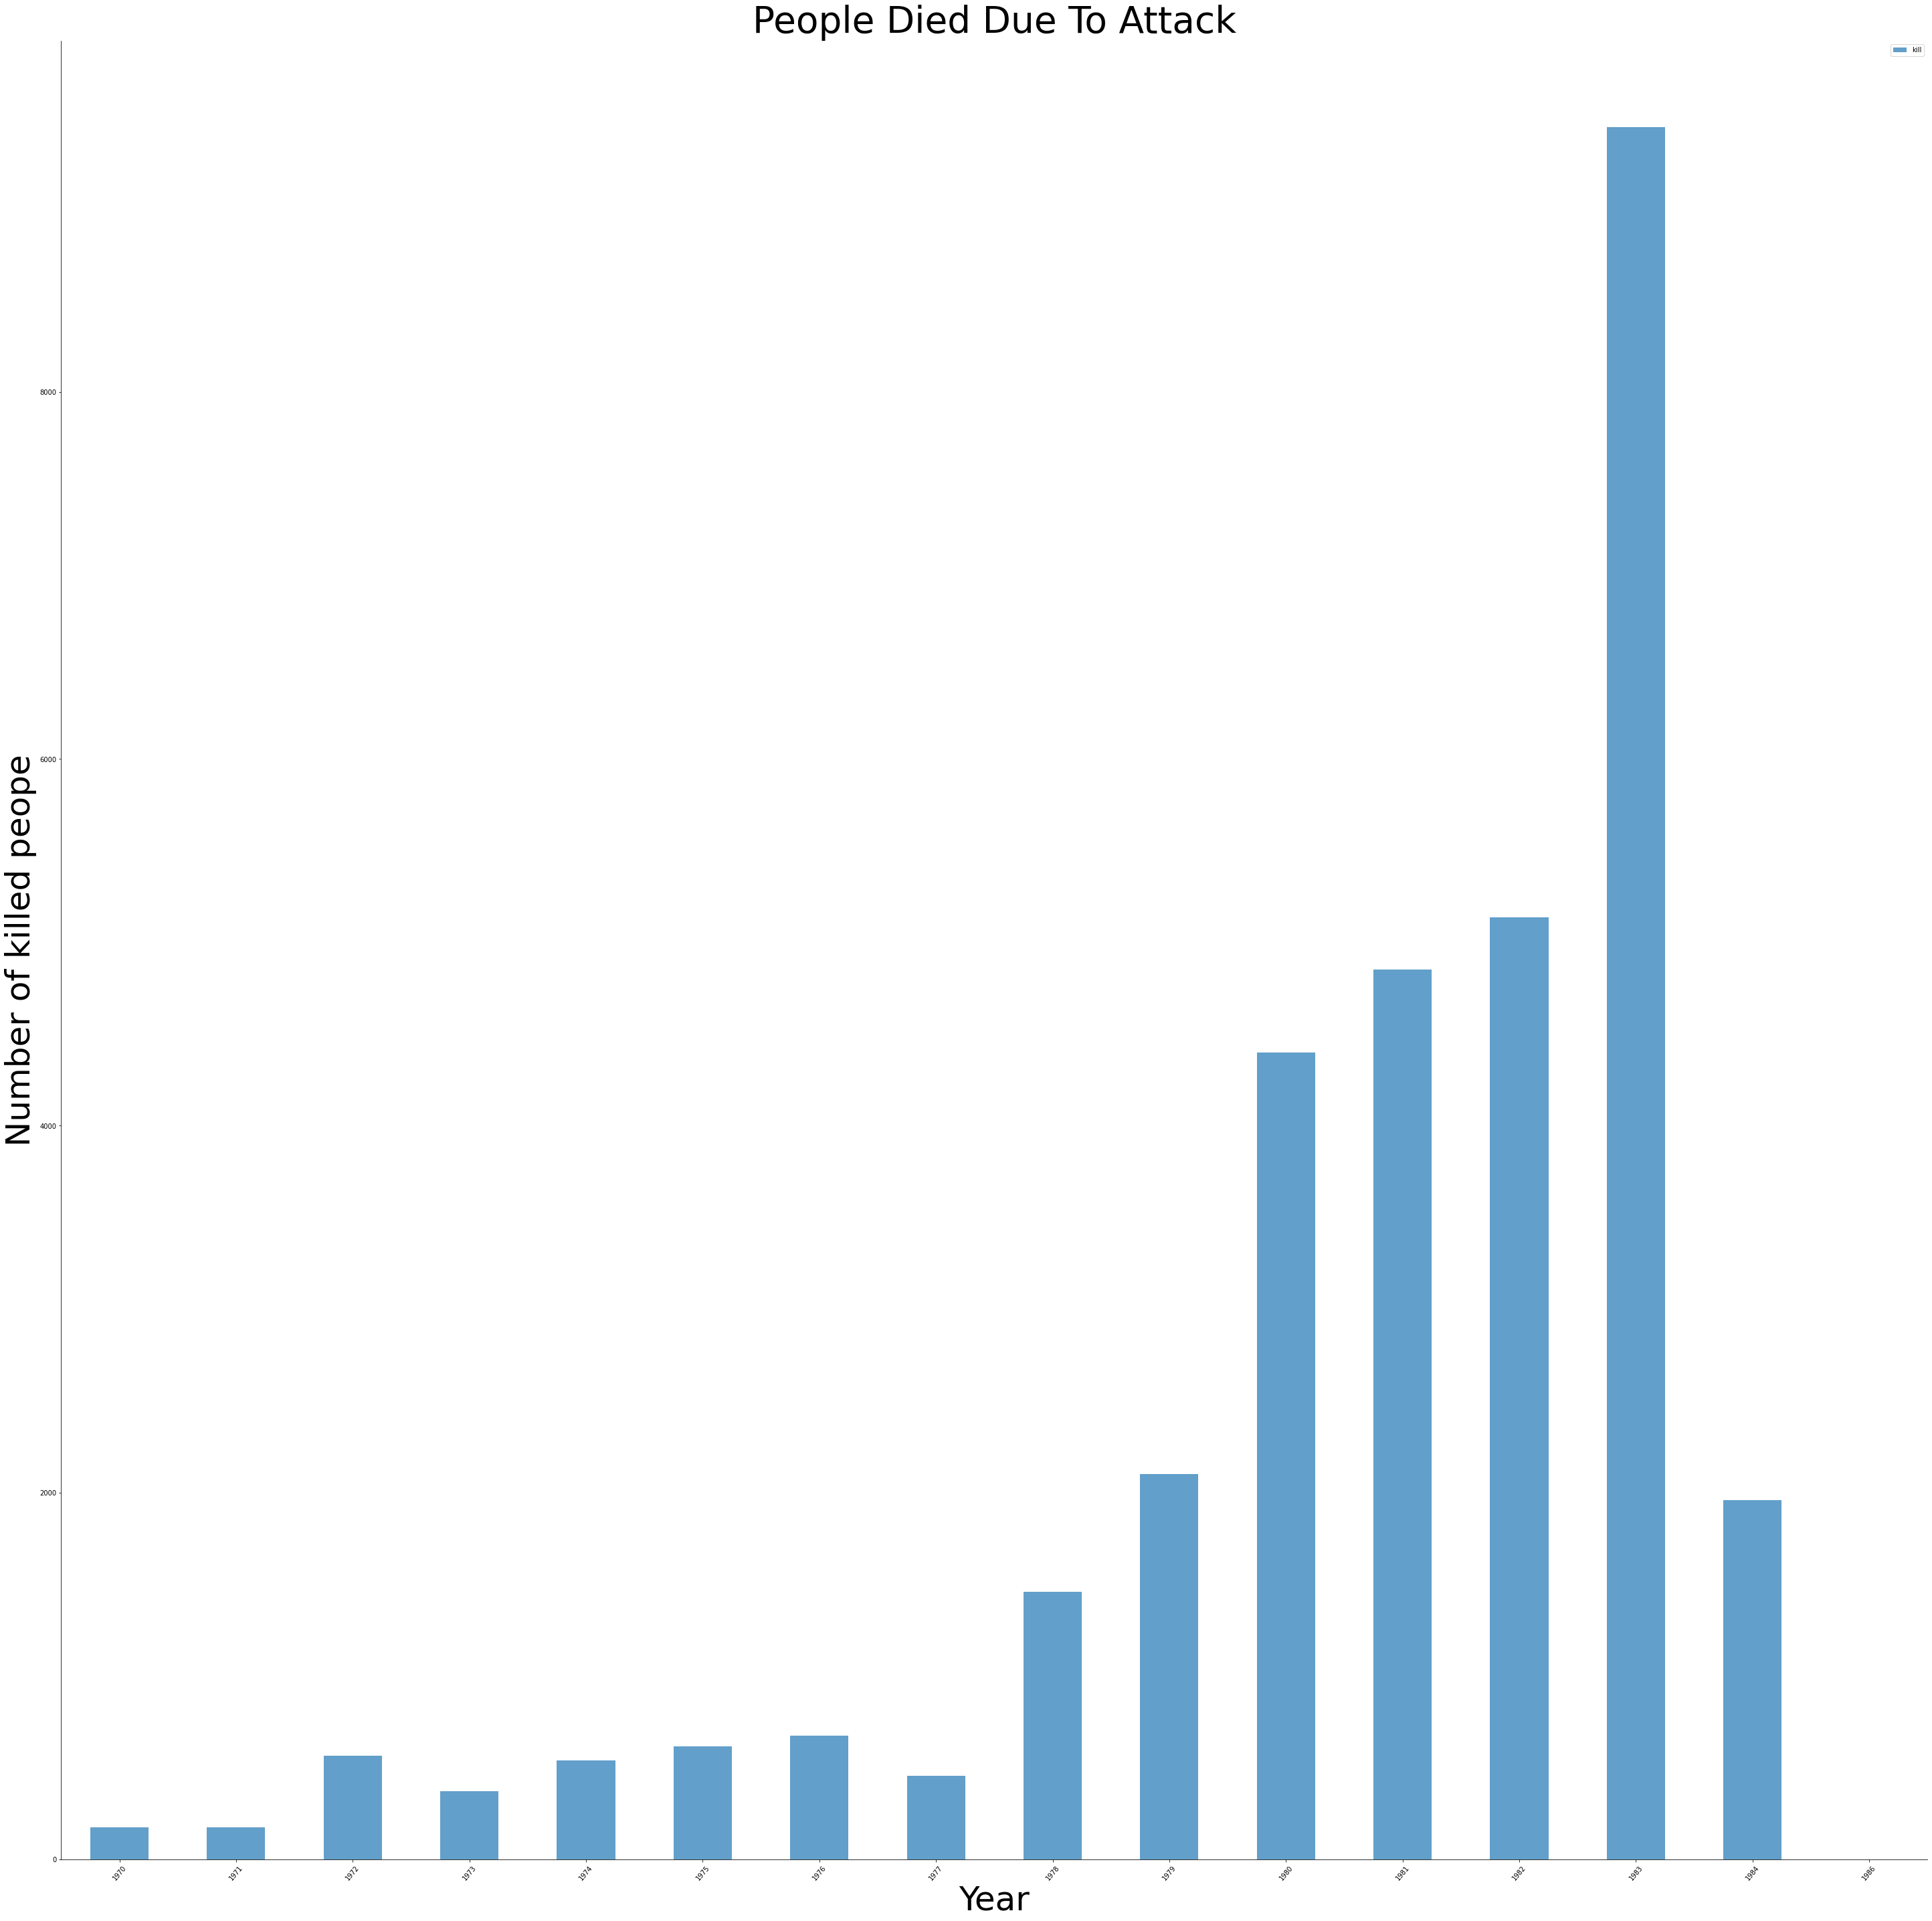

In [ ]:
df = data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(50,50))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=55)
plt.ylabel("Number of killed peope",fontsize=50)
plt.xlabel('Year',fontsize=50)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

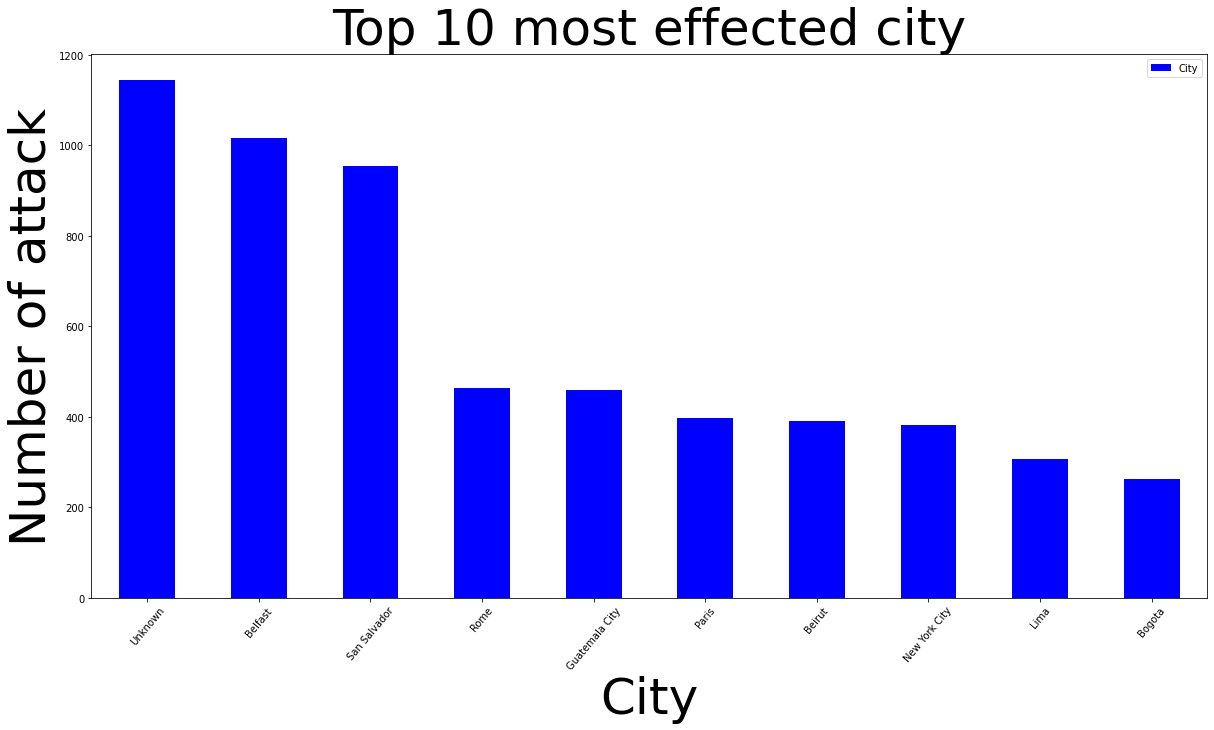

In [ ]:
data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=50)
plt.ylabel("Number of attack",fontsize=50)
plt.title("Top 10 most effected city",fontsize=50)
plt.show()

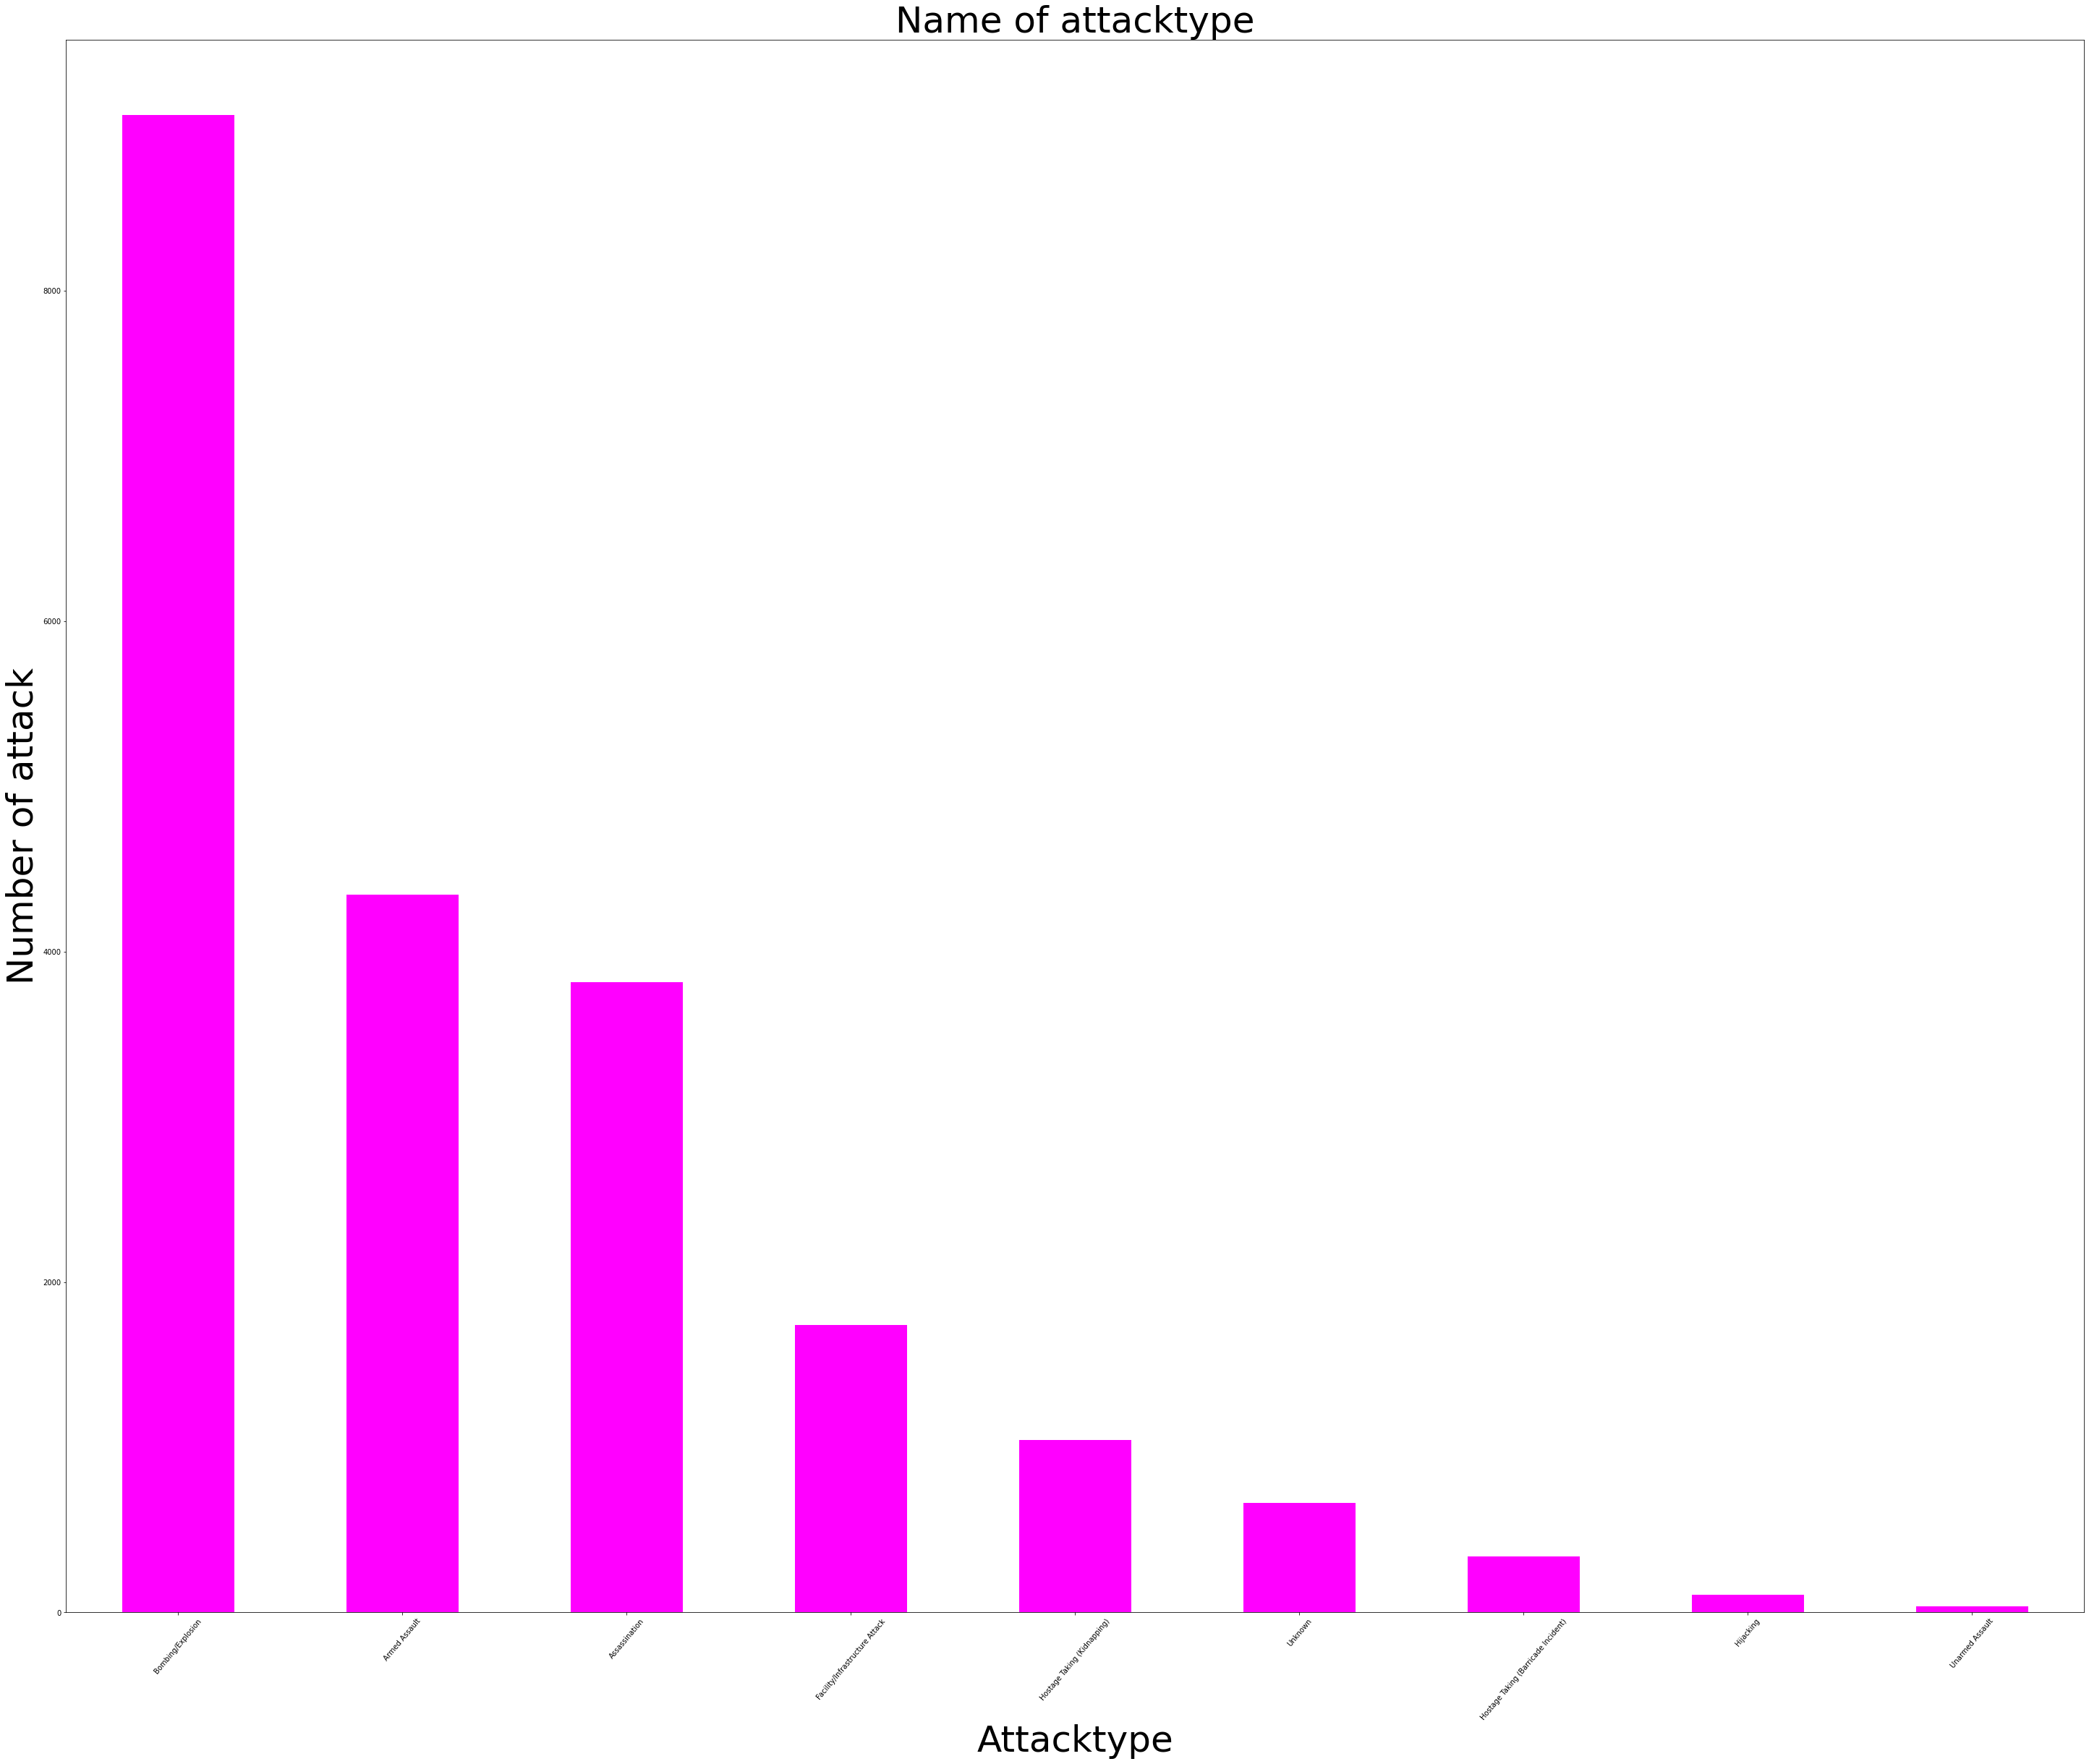

In [ ]:
data['Attacktype'].value_counts().plot(kind='bar',figsize=(50,40),color='magenta')
plt.xticks(rotation = 50)
plt.xlabel("Attacktype",fontsize=50)
plt.ylabel("Number of attack",fontsize=50)
plt.title("Name of attacktype",fontsize=50)
plt.show()

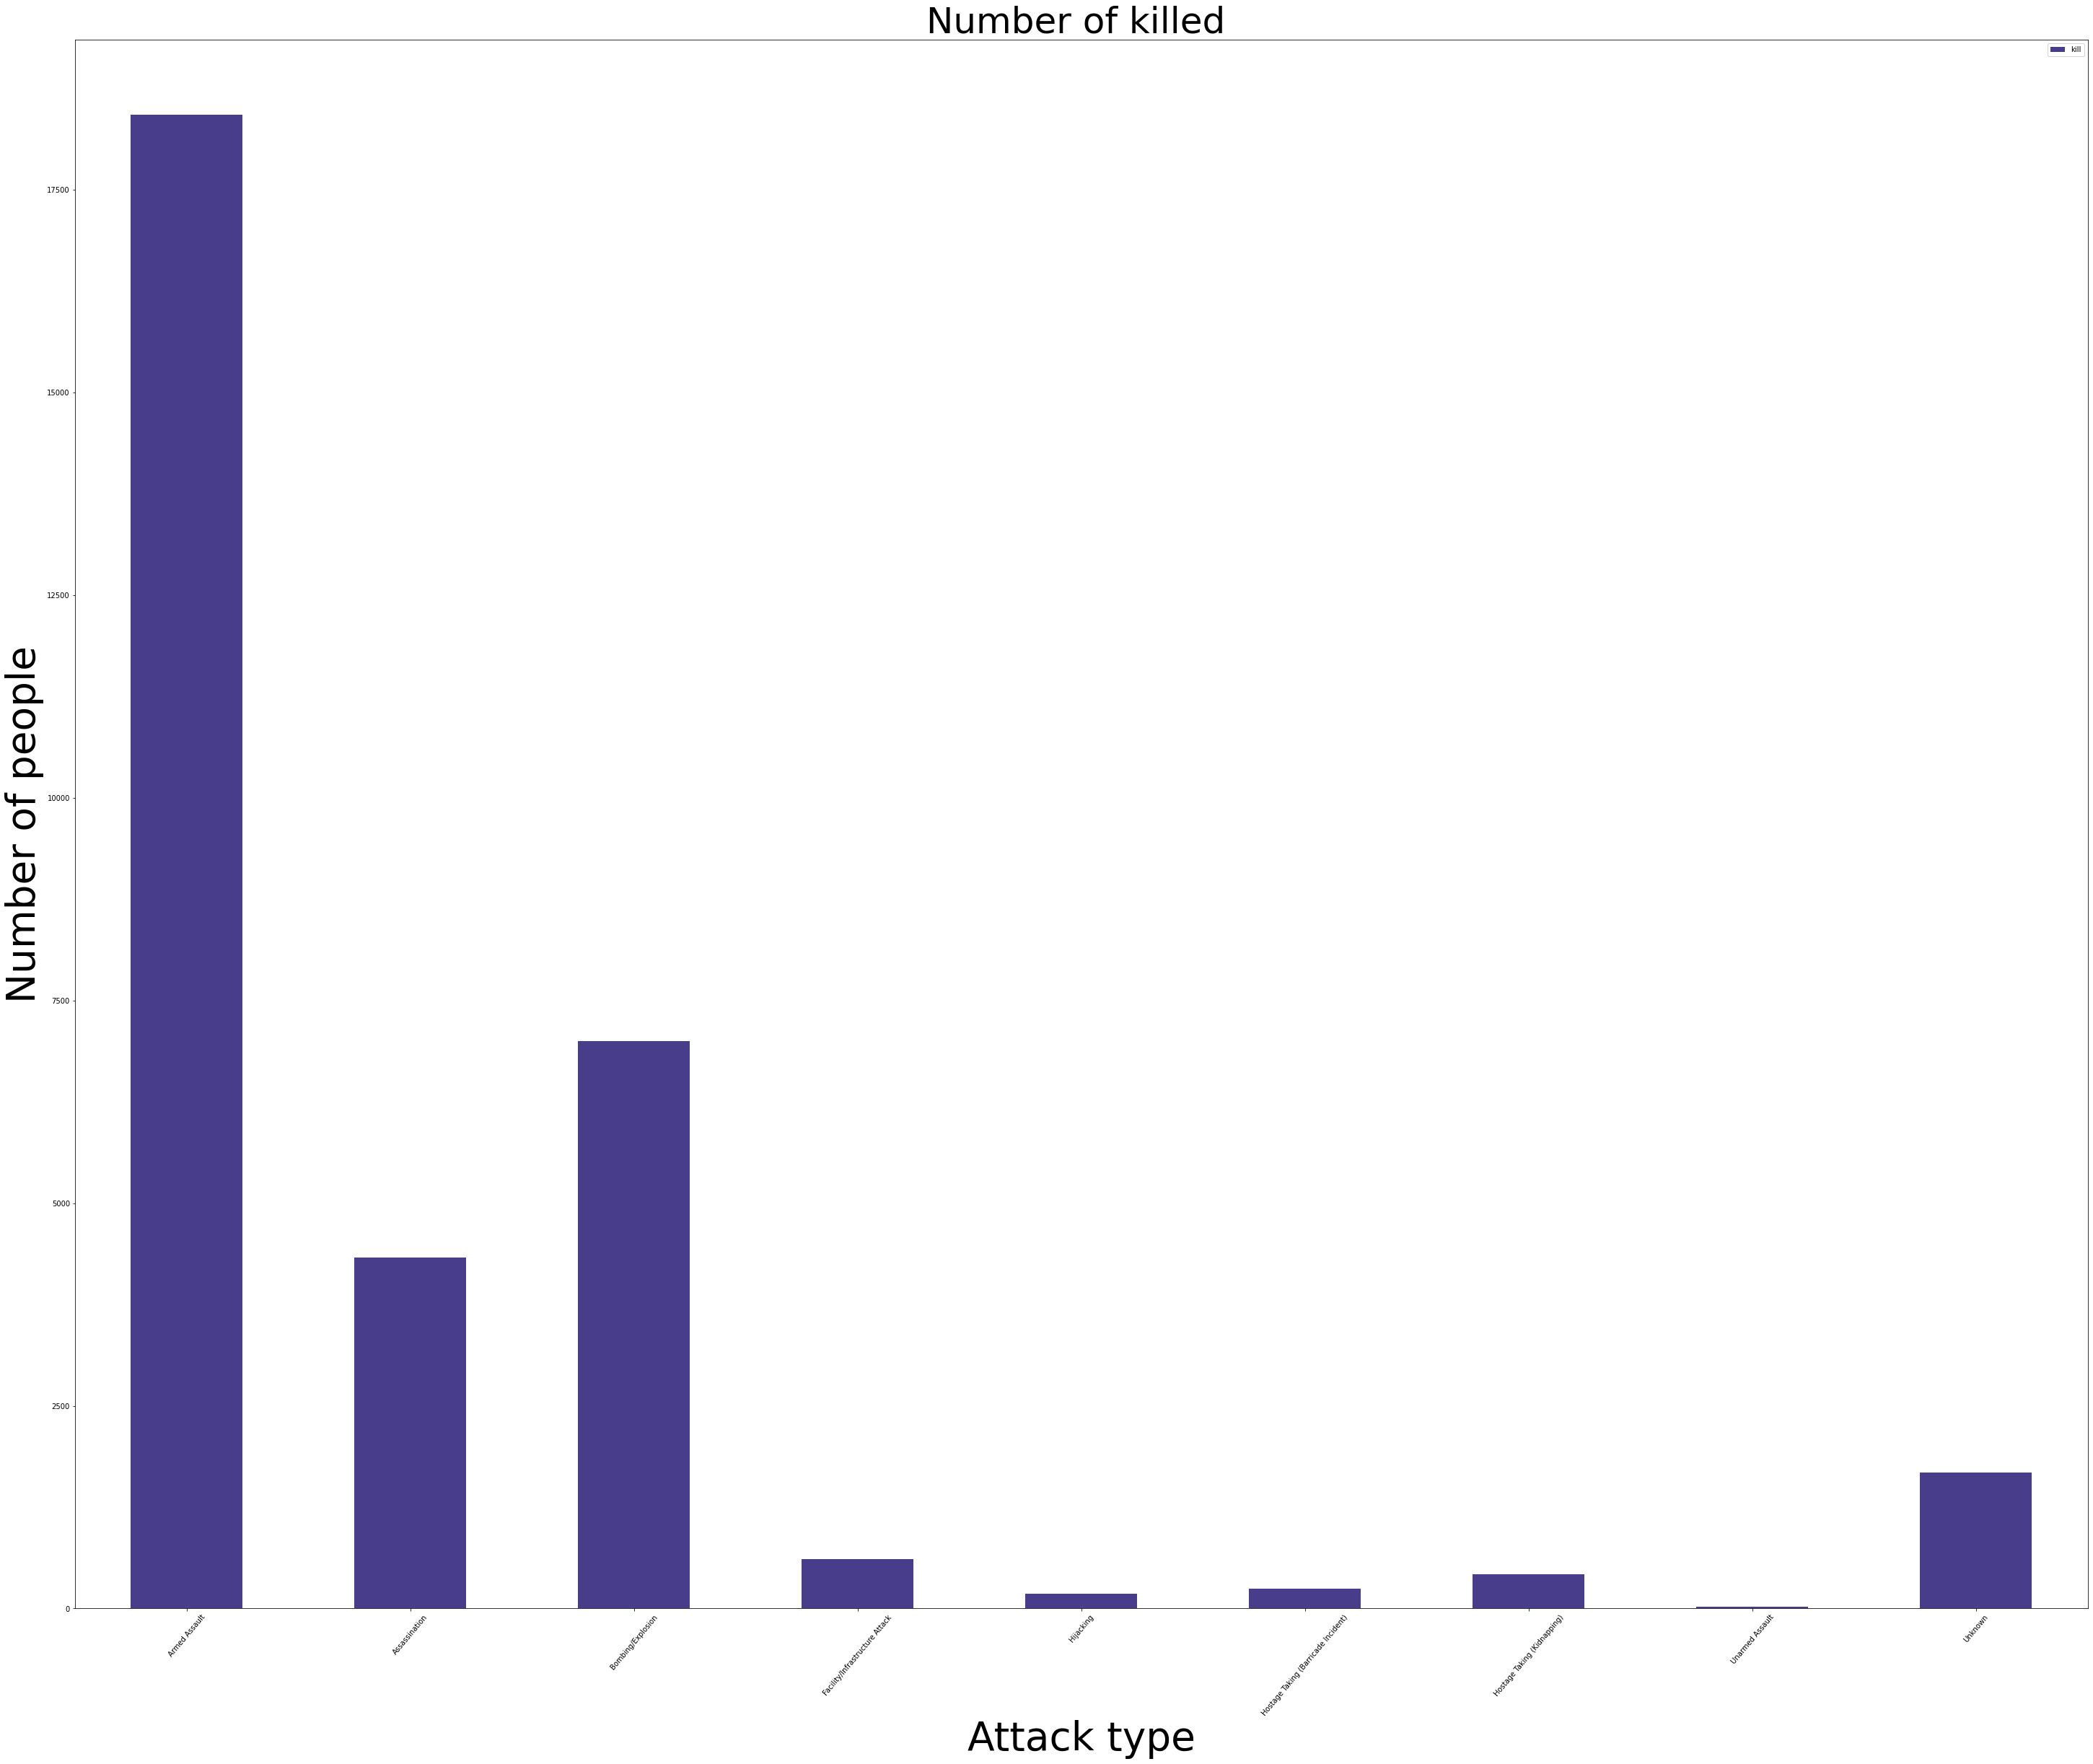

In [ ]:
data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(50,40),color=['darkslateblue'])
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=50)
plt.ylabel('Number of people',fontsize=55)
plt.xlabel('Attack type',fontsize=55)
plt.show()

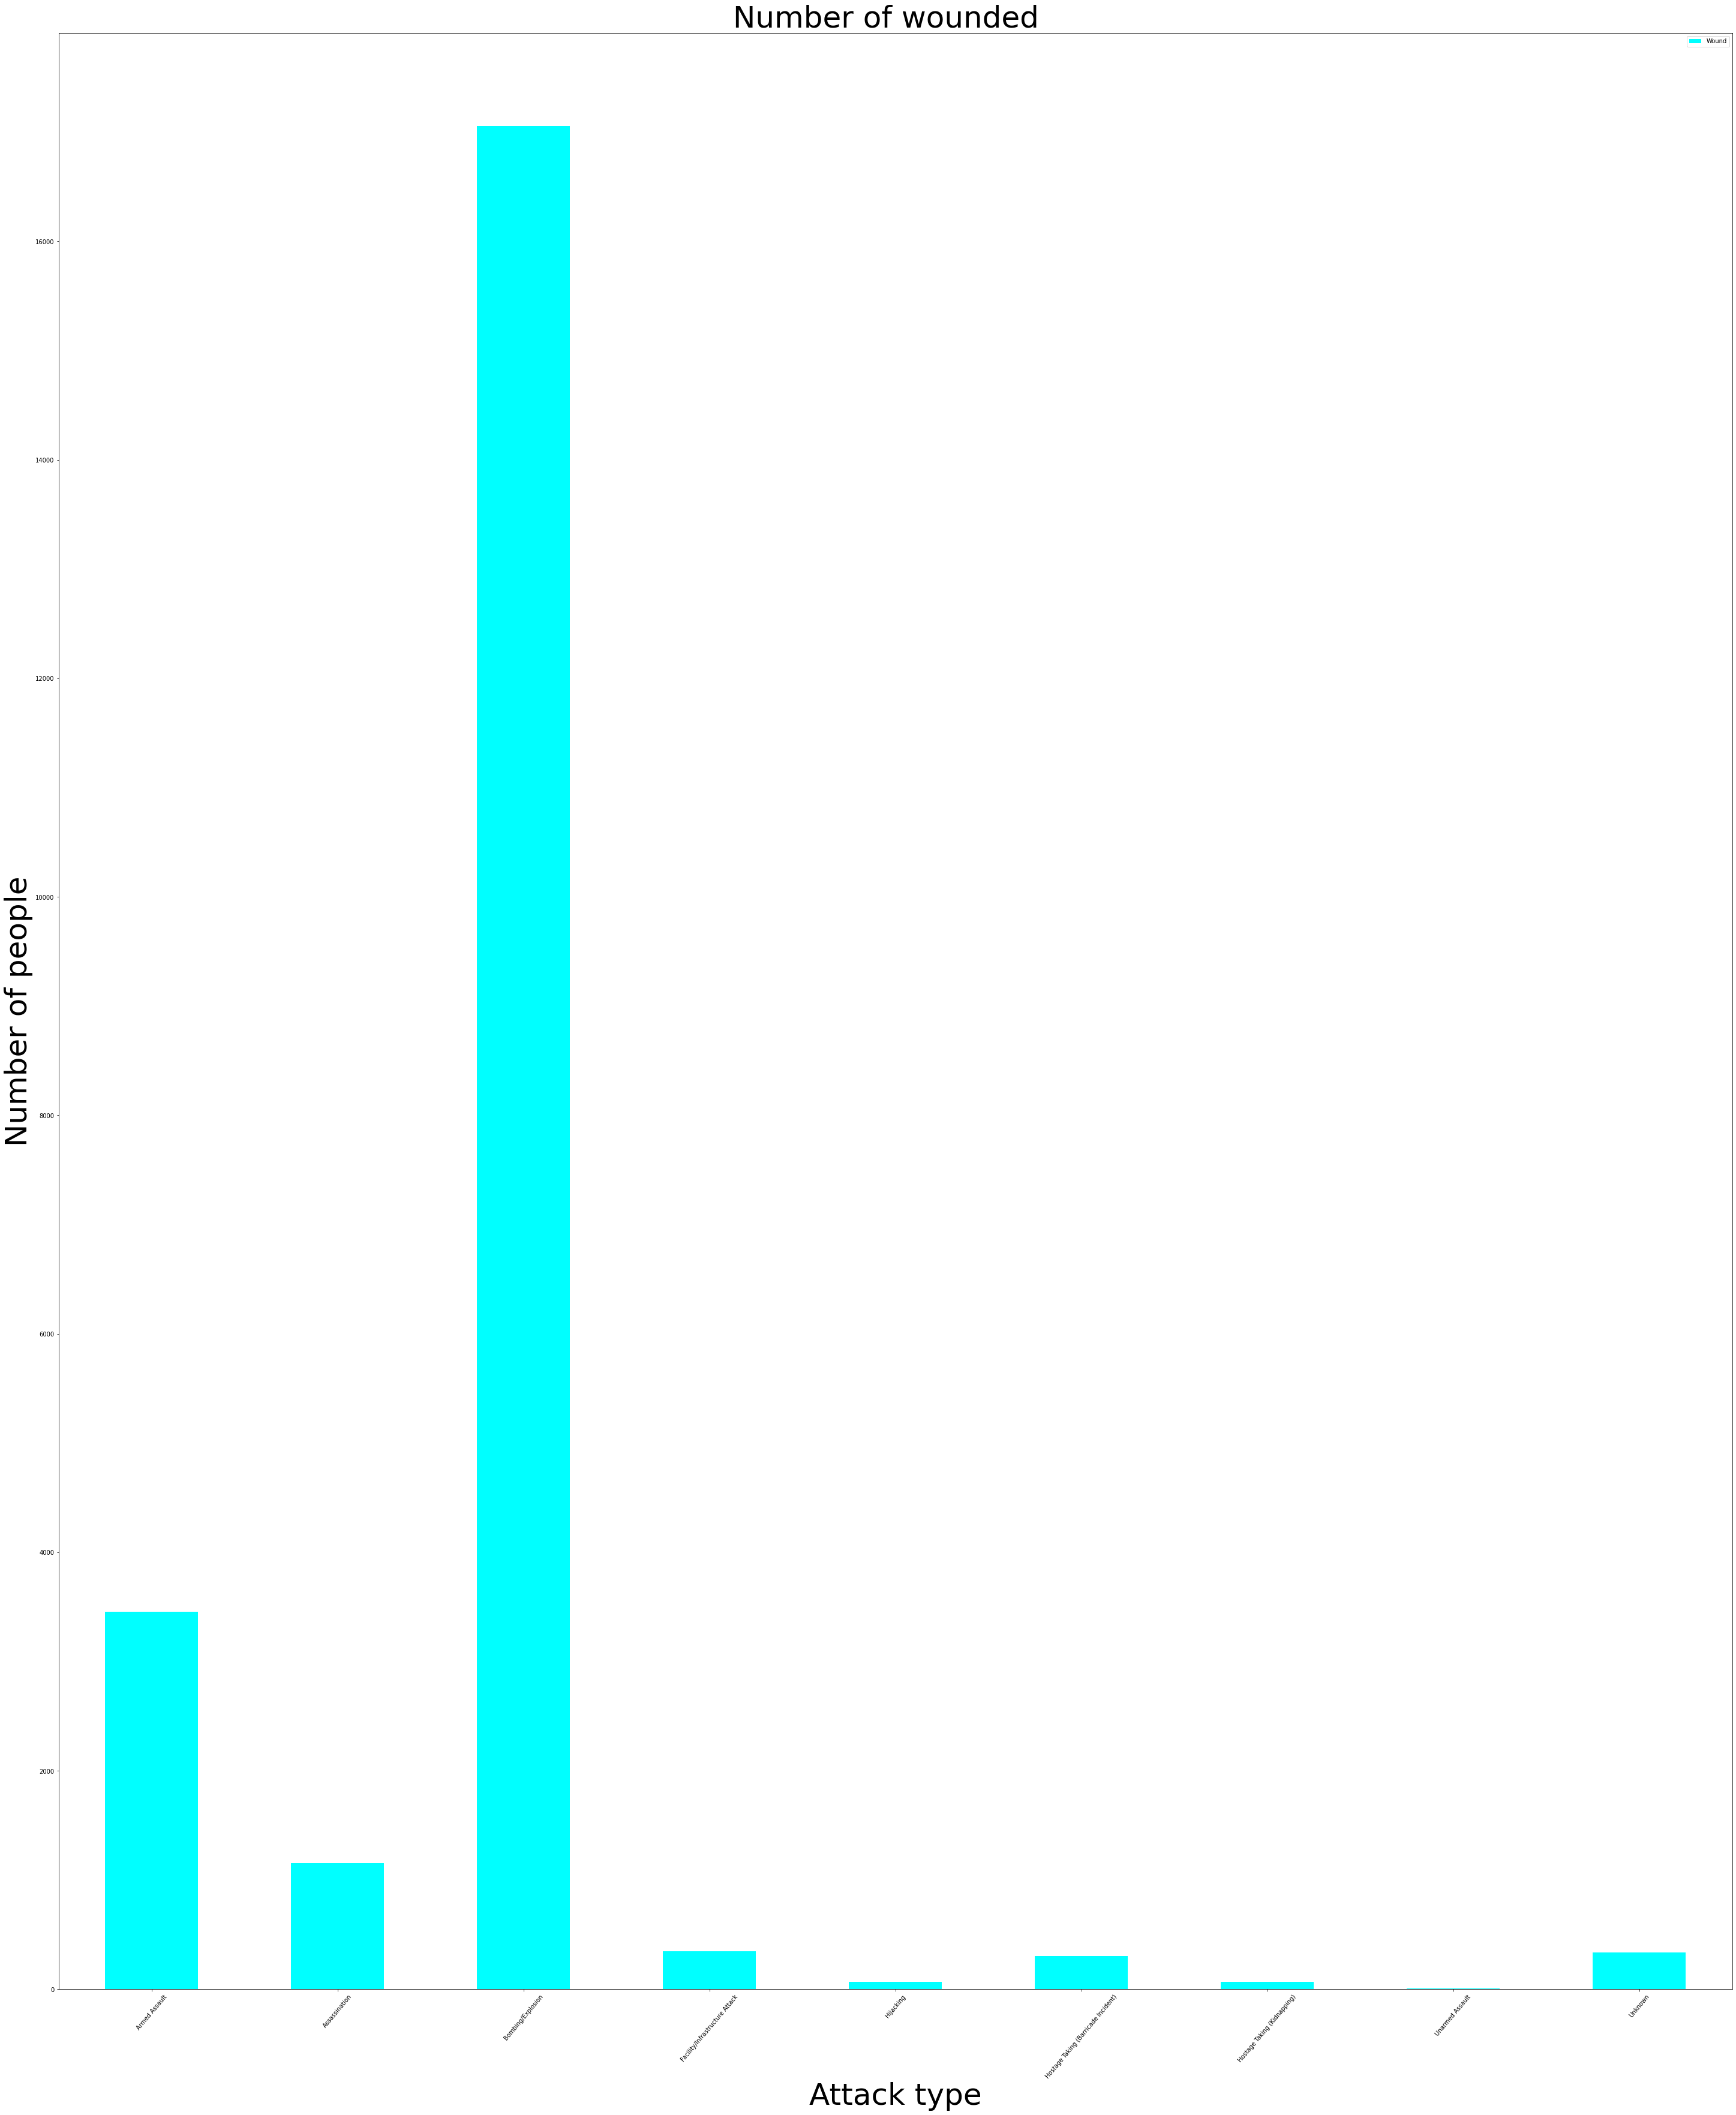

In [ ]:
data[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(50,60),color=['cyan'])
plt.xticks(rotation=50)
plt.title("Number of wounded  ",fontsize=50)
plt.ylabel('Number of people',fontsize=50)
plt.xlabel('Attack type',fontsize=50)
plt.show()

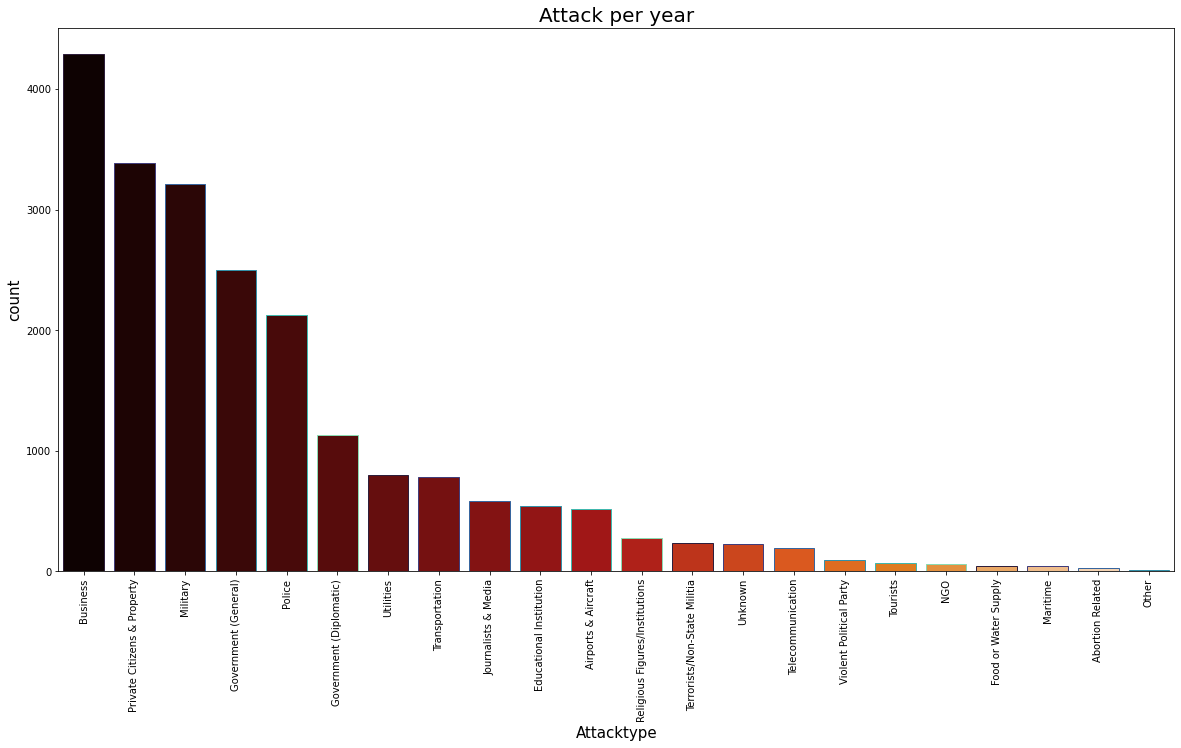

In [ ]:
plt.subplots(figsize=(20,10))
sns.countplot(data["Targettype"],order=data['Targettype'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("mako"));
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=20)
plt.show()

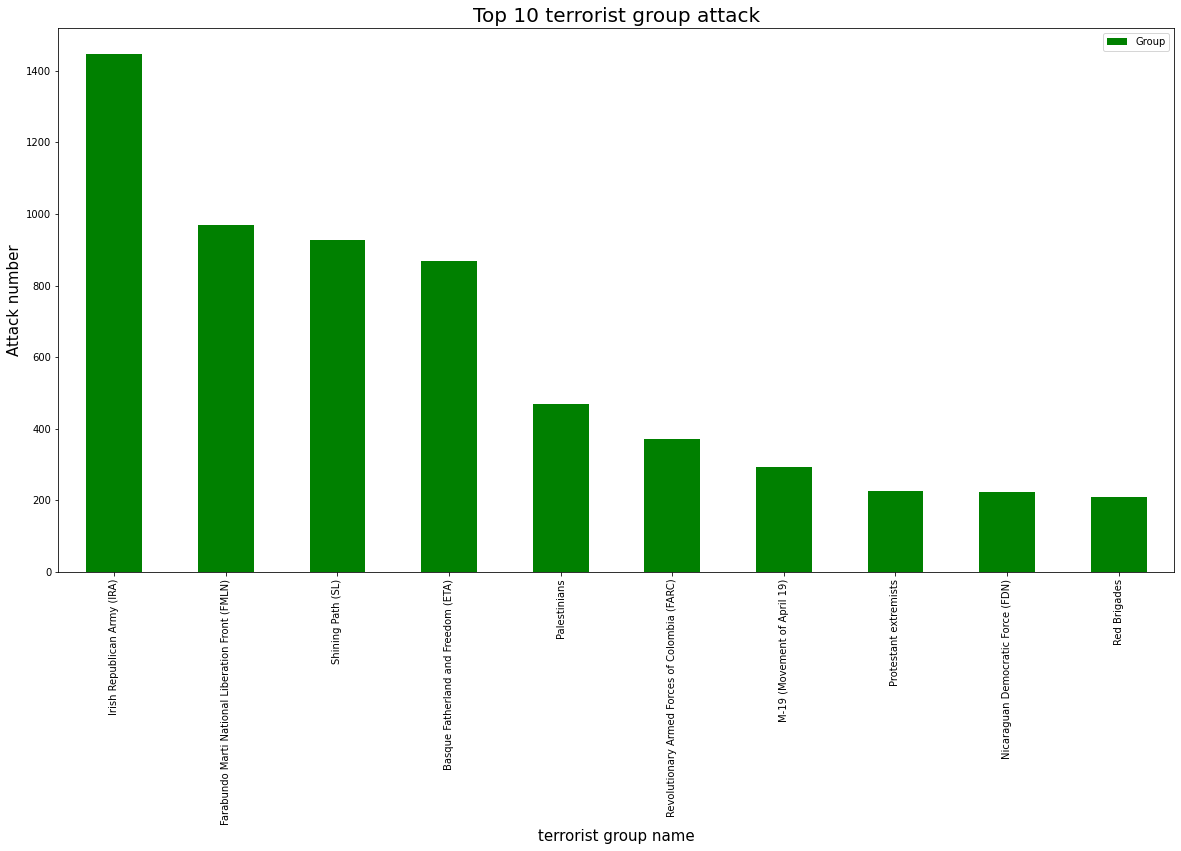

In [ ]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='green',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

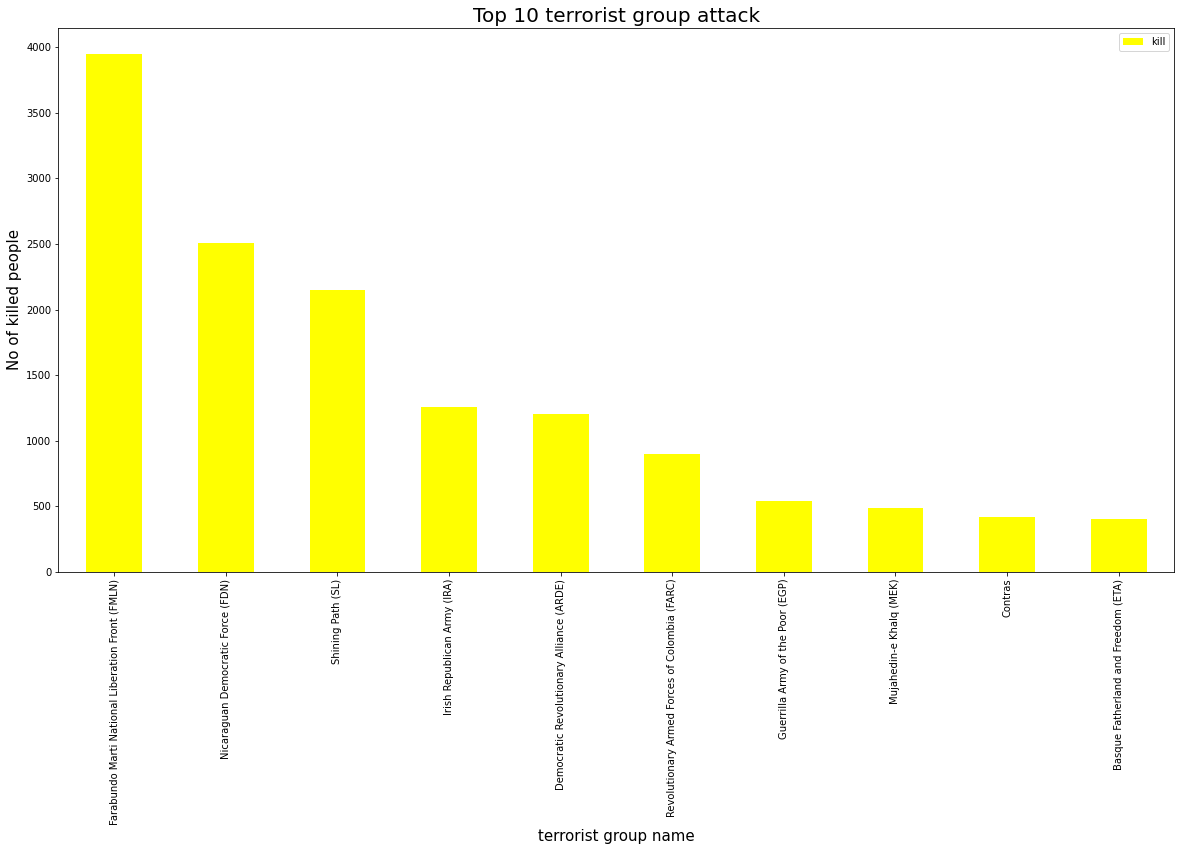

In [ ]:
data[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='yellow',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.show()

In [ ]:
df=data[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,kill
0,Farabundo Marti National Liberation Front (FMLN),El Salvador,3941.0
1,Nicaraguan Democratic Force (FDN),Nicaragua,2495.0
2,Shining Path (SL),Peru,2146.0
3,Irish Republican Army (IRA),United Kingdom,1214.0
4,Democratic Revolutionary Alliance (ARDE),Nicaragua,1206.0
5,Revolutionary Armed Forces of Colombia (FARC),Colombia,897.0
6,Guerrilla Army of the Poor (EGP),Guatemala,538.0
7,Mujahedin-e Khalq (MEK),Iran,489.0
8,Contras,Nicaragua,420.0
9,Basque Fatherland and Freedom (ETA),Spain,402.0


In [ ]:

kill = data.loc[:,'kill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))

Number of people killed by terror attack: 32918


In [ ]:
typeKill = data.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,18430.0,4333.0,6996.0,610.0,186.0,241.0,423.0,19.0,1680.0


In [ ]:
countryKill = data.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bahrain,...,Uruguay,Vatican City,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,53.0,0.0,0.0,0.0,309.0,331.0,6.0,12.0,0.0,0.0,...,4.0,0.0,44.0,65.0,70.0,0.0,4.0,1.0,5.0,59.0
